In [2]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# show all columns on pandas dataframes
pd.set_option('display.max_columns', None)



In [3]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}


<IPython.core.display.Javascript object>

In [17]:
%%R

#Install necessary r packages

# install.packages("ggthemes")
# install.packages("RColorBrewer")
# install.packages("ggrepel")
# install.packages("viridis")
# install.packages("circlize")


R[write to console]: Installing package into ‘/opt/homebrew/lib/R/4.2/site-library’
(as ‘lib’ is unspecified)



--- Please select a CRAN mirror for use in this session ---
Secure CRAN mirrors 

 1: 0-Cloud [https]
 2: Australia (Canberra) [https]
 3: Australia (Melbourne 1) [https]
 4: Australia (Melbourne 2) [https]
 5: Australia (Perth) [https]
 6: Austria [https]
 7: Belgium (Brussels) [https]
 8: Brazil (PR) [https]
 9: Brazil (RJ) [https]
10: Brazil (SP 1) [https]
11: Brazil (SP 2) [https]
12: Bulgaria [https]
13: Canada (MB) [https]
14: Canada (ON 3) [https]
15: Chile (Santiago) [https]
16: China (Beijing 2) [https]
17: China (Beijing 3) [https]
18: China (Hefei) [https]
19: China (Hong Kong) [https]
20: China (Guangzhou) [https]
21: China (Jinan) [https]
22: China (Lanzhou) [https]
23: China (Nanjing) [https]
24: China (Shanghai 2) [https]
25: China (Shenzhen) [https]
26: Colombia (Cali) [https]
27: Costa Rica [https]
28: Czech Republic [https]
29: Denmark [https]
30: East Asia [https]
31: Ecuador (Cuenca) [https]
32: France (Lyon 1) [https]
33: France (Lyon 2) [https]
34: France (Marseil

In [4]:
%%R

# All my R imports

library(tidyverse)
library(ggplot2)
library(dplyr)
library(gridExtra)
library(ggthemes)
library(RColorBrewer)
library(grid)
library(gridExtra)
library(ggrepel)
library(viridis)
library(circlize)



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.1      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


R[write to console]: 
Attaching package: ‘gridExtra’


R[write to console]: The following object is masked from ‘package:dplyr’:

    combine


R[write to console]: Loading required package: viridisLite

R[write to console]: ========================================
circlize version 0.4.15
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualization
  in R. Bioinformatics 2014.

This message can be suppressed by:
  suppressPackageStartupMessages(library(circlize))




In [5]:
%%R

results <- read.csv('data/results.csv',stringsAsFactors=F)
#results

In [6]:
%%R

results$fastestLapSpeed<-as.numeric(results$fastestLapSpeed)
convertFastestLap <- function(x){
    if(length(x)>0) {
        curMinute<-as.numeric(strsplit(x,":")[[1]][1])
        curSecond<-as.numeric(strsplit(strsplit(x,":")[[1]][2],"\\.")[[1]][1])
        return(curMinute*60 + curSecond)
        }
        else if(length(x)==0){
            return(NA)
        }
}
results$fastestLapTimeNum<-sapply(results$fastestLapTime, convertFastestLap)

In [7]:
%%R

races<-read.csv('data/races.csv',stringsAsFactors=F,sep=',')
#convert character to Date
races$date<-as.Date(races$date,"%Y-%m-%d")
#remove "Grand Prix" in the name
races$name<-gsub(" Grand Prix","",races$name)


In [10]:
%%R

results_2<-left_join(
  results %>% dplyr::select(-time, -fastestLapTime), 
  races %>% dplyr::select(-time, -url), 
  by='raceId')

circuits <- read.csv("data/circuits.csv",sep=",",stringsAsFactors=F)
races <- left_join(races %>% select(-name,-url), circuits %>% select(-url), by='circuitId')

#head(results_2, n=10)

`summarise()` has grouped output by 'name'. You can override using the
`.groups` argument.


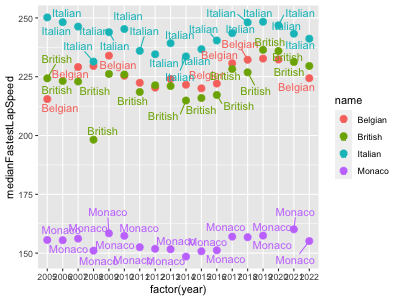

In [76]:
%%R -w 400 -h 300

results_2 %>% 
  dplyr::filter(year>2004) %>% 
  dplyr::group_by(name,year) %>%
  dplyr::filter(name == "Monaco" | name == "British" | name == "Italian" | name == "Belgian") %>%
  summarize(medianFastestLapSpeed = median(fastestLapSpeed,na.rm=T))  %>%
  ggplot(aes(x=factor(year),y= medianFastestLapSpeed,color=name)) +
  geom_point(size=3) +
  geom_text_repel(aes(label=name)) 

#ggsave("fourracesreal.pdf", plot = last_plot(), device = "pdf")

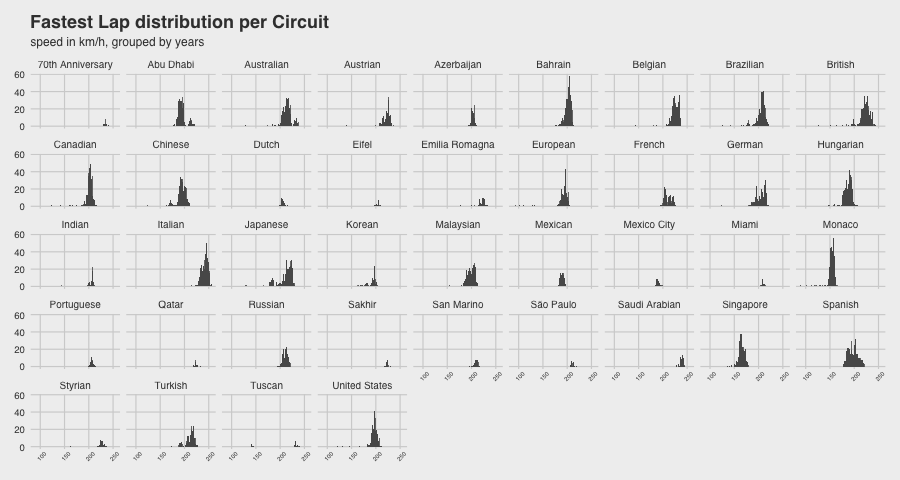

In [ ]:
%%R -w 900

#not using this! using the one above

results_2 %>% 
  dplyr::filter(year>2004) %>% 
  dplyr::group_by(name) %>% 
  ggplot(aes(x=fastestLapSpeed)) + 
  geom_histogram(bins=100) + theme_fivethirtyeight() + 
  scale_color_gradientn(name="",colours=rev(viridis::viridis(20))) +
  theme(
    axis.text.x = element_text(size=6,angle=45),
    strip.text.x = element_text(size = 10)) + facet_wrap(~name,ncol=9) + 
  labs(title='Fastest Lap distribution per Circuit',
       subtitle='speed in km/h, grouped by years') +
  guides(color=FALSE)

  #in monaco most fastest laps are of average speed 150 km/h
  #this is much slower than british GP and italian gp 
  #which are the fastest circuits


`summarise()` has grouped output by 'name'. You can override using the
`.groups` argument.


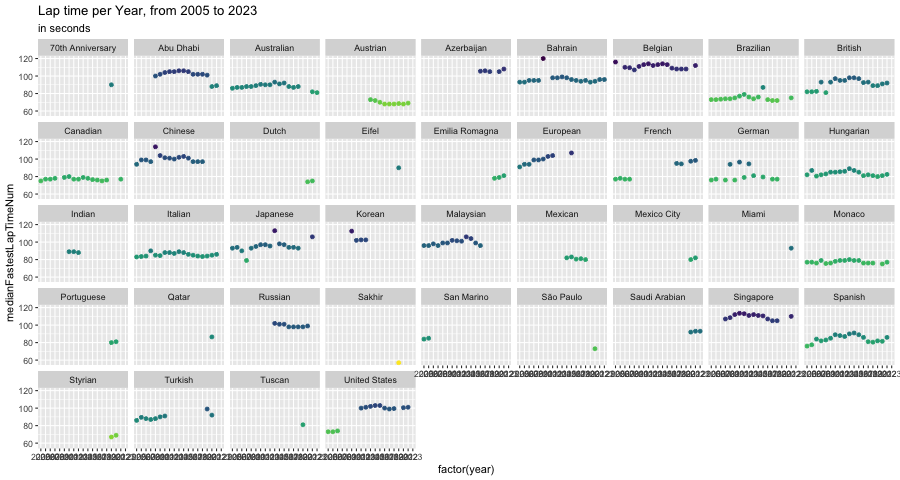

In [12]:
%%R -w 900
results_2 %>% 
  dplyr::filter(year>2004) %>% 
  dplyr::group_by(name,year) %>% 
  summarize(medianFastestLapTimeNum = median(fastestLapTimeNum,na.rm=T)) %>% 
  ggplot(aes(x=factor(year),y= medianFastestLapTimeNum, color=medianFastestLapTimeNum)) +
  geom_point() + 
  scale_color_gradientn(name="",colours=rev(viridis::viridis(20))) + facet_wrap(~name,ncol=9) + 
  labs(title='Lap time per Year, from 2005 to 2023',
       subtitle='in seconds') +
  guides(color=FALSE)

In [55]:
%%R -w 900

results_2 %>% 
  dplyr::filter(year>2004) %>% 
  dplyr::group_by(name,year) %>% 
  summarize(medianFastestLapTimeNum = median(fastestLapTimeNum,na.rm=T)) %>% 
  ggplot(aes(x=factor(year),y= medianFastestLapTimeNum, color=medianFastestLapTimeNum)) +
  geom_boxplot(alpha=.25) + theme_fivethirtyeight() + 
  geom_jitter(shape=16,position=position_jitter(0.2),size=1.5) + 
  geom_smooth(method='loess',aes(group=1),color='red',lty=2,size=.5) +
  scale_color_gradientn(name="",colours=rev(viridis::viridis(20))) + 
  labs(title='Lap time per Year',
       subtitle='in seconds, grouped by all Grand Prix') + 
  guides(color = FALSE)

ggsave("alllaptime.pdf", plot = last_plot(), device ="pdf")

`summarise()` has grouped output by 'name'. You can override using the
`.groups` argument.
Saving 12.5 x 6.67 in image
`geom_smooth()` using formula = 'y ~ x'


In [53]:
%%R -w 600

#for just Monaco
#this should just be a line chart right?


results_2 %>% 
  dplyr::filter(year>2004) %>% 
  dplyr::group_by(name,year) %>% 
  dplyr::filter(name == "Monaco") %>% 
  summarize(medianFastestLapTimeNum = median(fastestLapTimeNum,na.rm=T)) %>% 
  ggplot(aes(x=factor(year),y= medianFastestLapTimeNum, color=medianFastestLapTimeNum)) + 
  geom_jitter(shape=16,position=position_jitter(0.2),size=1.5) + 
  geom_smooth(method='loess',aes(group=1),color='red',lty=2,size=.5) +
  scale_color_gradientn(name="",colours=rev(viridis::viridis(20))) + 
  labs(title='Monaco\'s Lap time per Year',
       subtitle='in seconds, grouped by all Grand Prix. Higher the lap time, the slower the cars are. 2008 was slow because of rainy weather') + 
  guides(color = FALSE)

ggsave("monacolaptime.pdf", plot = last_plot(), device = "pdf")

`summarise()` has grouped output by 'name'. You can override using the
`.groups` argument.
Saving 8.33 x 6.67 in image
`geom_smooth()` using formula = 'y ~ x'


In [ ]:
%%R -w 900



In [14]:
#import csv in pandas

weight = pd.read_csv("/Users/shivanireddy/Desktop/dataclasses/datastudio/project4/data/weight.csv")



In [15]:
weight

,Year,Weight,Changes
0,2008,585,NaN
1,2009,605,NaN
2,2010,620,Refuelling is banned
3,2011,640,Kinetic Recovery System (KERS) widely adopted
4,2012,640,NaN
5,2013,642,Minor changes in the weight of Pirelli’s tyre ...
6,2014,691,Hybrid V6 engines introduced
7,2015,702,Anti-intrusion panels added to cockpit
8,2016,702,NaN
9,2017,728,Wider wheels and tyres introduced


In [122]:
%%R -i weight -h 350

weightplot <- ggplot(weight, aes(x=Year, y=Weight)) +
  geom_point(aes(size=Weight)) +
  geom_text_repel(aes(label=Weight)) + 
  scale_x_continuous(breaks = 2008:2022)

weightplot

ggsave("weightplot3.pdf", plot = weightplot, device = "pdf")

Saving 6.67 x 4.86 in image


In [42]:
weight2019 = pd.read_csv("/Users/shivanireddy/Desktop/dataclasses/datastudio/project4/weight2019.csv")



In [77]:
%%R -i weight2019 -h 200

weightplot2 <- ggplot(weight2019, aes(x=Year, y=Weight)) +
  geom_point(aes(size=Weight, alpha =0.4)) +
  geom_text_repel(aes(label=Weight))

ggsave("weightplot2.pdf", plot = weightplot2, device = "pdf")



Saving 6.67 x 2.78 in image


In [92]:
overtakes = pd.read_csv("data/overtakes.csv")

overtakes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Year             10 non-null     int64
 1   Total_overtakes  10 non-null     int64
dtypes: int64(2)
memory usage: 288.0 bytes


In [97]:
%%R -i overtakes

overtakes

  Year Total_overtakes
0 2011              28
1 2012              13
2 2013              17
3 2014              10
4 2015              10
5 2016              14
6 2017               3
7 2018               4
8 2019               2
9 2021               0


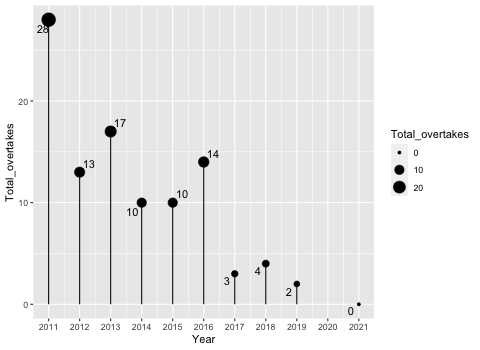

In [114]:
%%R -i overtakes -h 350 

overtakes <- ggplot(overtakes, aes(x=Year, y=Total_overtakes)) +
  geom_point(aes(size=Total_overtakes)) +
  geom_segment(aes(x=Year, xend=Year, y=0, yend=Total_overtakes)) + 
  geom_text_repel(aes(label=Total_overtakes)) + 
  scale_x_continuous(breaks = 2011:2021)

overtakes